In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_regression

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv("P:\MASTER\2022\x2\X/2020-9-22--550hours.csv", index_col="datetime")
data.head()

In [25]:
min_max_scaler = MinMaxScaler()
F_data = pd.DataFrame(data = min_max_scaler.fit_transform(data), 
                  index = data.index, 
                  columns = data.columns)
inputs  = F_data.iloc[:,:-1] # read all data as input
outputs = np.reshape(np.array(F_data.iloc[:,-1]),(-1,1)).astype('float32') # Use the last Columns 'neoScattering' as output


### Calculate the The Importance score of each Feature regarding The Y value

### Statistical tests

In [36]:
# here we will use the Select best Tool which based on Statistical tests

bestfeatures = SelectKBest(score_func=f_regression, k=30)
fit = bestfeatures.fit(np.array(inputs),outputs)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(inputs.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score Importance']  #naming the dataframe columns
print(featureScores.nlargest(30,'Score Importance'))  

                                 Feature  Score Importance
12                           SALTVEKT TT      54532.136493
17                          DIVERSE VEKT      40336.308365
29                          NPLUT-INND B      33663.850503
6                           NPLUT-INND A      32639.880176
13                             INNDAER 2      26892.583144
7                      SALTVEKT TT W3401      22366.201045
14                          AM-LUTVLAS B      21659.711440
1                           AM-LUTVLAS A      20753.316159
24  Temperatur T3402 inndamping væskelås      20510.192839
0                              INNDAER 1      19855.014049
11  Temperatur T3401 inndamping væskelås      15716.245111
4                             Kalivekt A      15472.358699
16                            Kalivekt B      14276.126672
3                           DOLOM VEKT A      10567.254301
2                             BOR VEKT A       7948.726237
15                          DOLOM VEKT B       7754.3832

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Feature Importance
We can get the feature importance of each feature of dataset by using ExtraTreesRegressor which calculate the feature importance property of the model.

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(inputs,outputs)

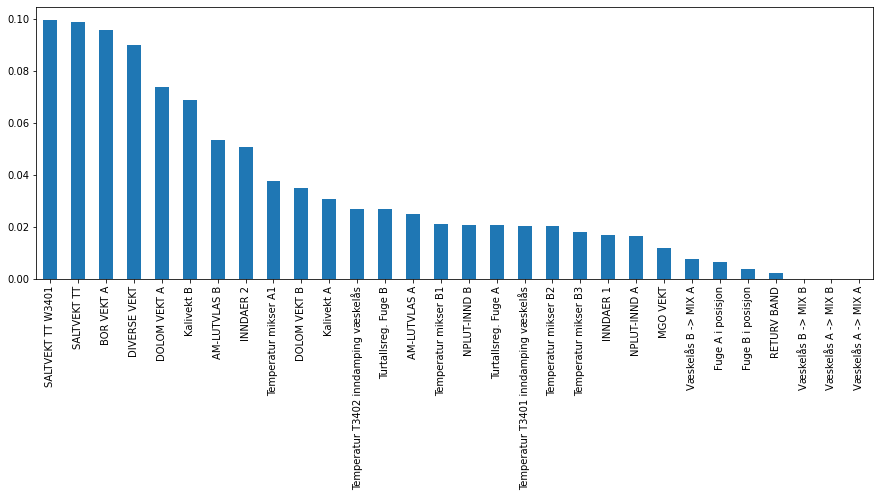

In [62]:
feat_importances = pd.Series(model.feature_importances_, index=inputs.columns)
plt.figure(figsize=(15,5))
feat_importances.nlargest(30).plot(kind='bar')
plt.show()

### Heat Map

 Check the last Column in order to know the most important feature that effect the NneScattering Value
 Higher is better


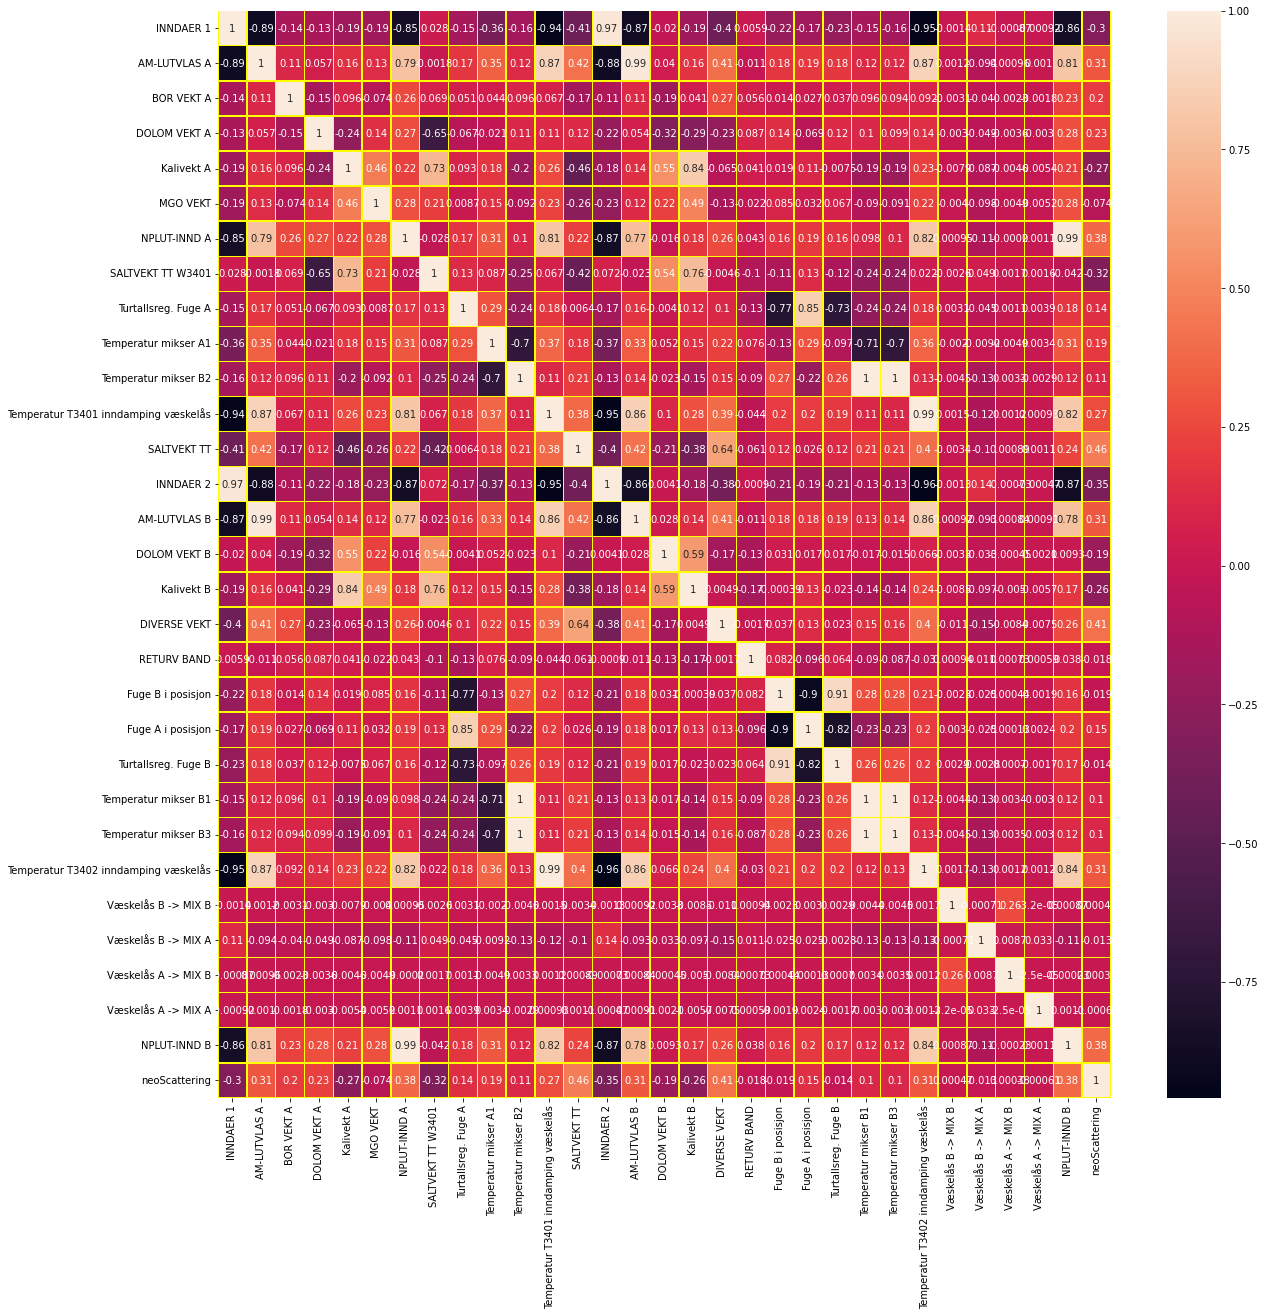

In [71]:
corrmat = F_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
linewidths = 0.4
linecolor = "yellow"
#plot heat map
print(" Check the last Column in order to know the most important feature that effect the NneScattering Value\n Higher is better")
g = sns.heatmap(data[top_corr_features].corr(),annot=True,linewidths=linewidths,
                linecolor=linecolor)
